## Import Datasets

In [1]:
import pandas as pd
import seaborn as sns
import pickle
import numpy as np

In [2]:
subscribers = pd.read_pickle(r'Data/subscribers')

In [4]:
subscribers['subid'].nunique()

227628

In [5]:
engagement = pd.read_pickle(r'Data/engagement')

In [6]:
engagement.isnull().sum()

subid                                  0
date                                   0
app_opens                          34611
cust_service_mssgs                 34611
num_videos_completed               34611
num_videos_more_than_30_seconds    34611
num_videos_rated                   34611
num_series_started                 34611
payment_period                         0
dtype: int64

In [7]:
engagement_nona = engagement.dropna()

In [13]:
#Getting correlation stats of engagement
people = engagement_nona.columns.to_list()
people.remove('subid')
people.remove('date')
people.remove('payment_period')
list_of_pairs = [(p1, p2) for p1 in people for p2 in people if p1 != p2]

In [14]:
from scipy.stats import pearsonr

def get_corr(t1):
    print(t1[0])
    print(t1[1])
    return pearsonr(engagement_nona[t1[0]],engagement_nona[t1[1]])

In [15]:
for i in (list_of_pairs):
    print(get_corr(i))
    

# correlation check seems okay

In [16]:
engagement_nona['subid'].nunique()

135019

In [10]:
cs = pd.read_pickle(r'Data/customer_service_reps')

In [12]:
cs['subid'].nunique()

1369360

In [13]:
cs.shape

(2208643, 13)

In [68]:
min(cs['account_creation_date'])

Timestamp('2019-06-30 00:00:04')

In [14]:
#Get list of  customer IDs that are present in all 3 datasets

engagement_userids = engagement['subid'].tolist()
subscribers_userids = subscribers['subid'].tolist()
customers_userids = cs['subid'].tolist()

len(list(set(engagement_userids) & set(subscribers_userids)))

customer_list = list(set(customers_userids) & set(subscribers_userids) & set(engagement_userids))

# AB Testing
- No Trial Fee vs Discounted Trial Fee
- 7 Day Trial Period vs 14 Day Trial Period 


Control:
Base_UAE_14_Day Trial

Treatment:
High_UAE_14_Day_Trial 
Low_UAE_No_Trial

Target variable: Cancel before trial ends - If they convert to full time subscribers
                Refund after trial ends - No revenue from them too

In [15]:
subscribers['plan_type'].value_counts()

base_uae_14_day_trial                227096
high_uae_14_day_trial                   325
low_uae_no_trial                        167
base_eur_14_day_trial                    18
high_sar_14_day_trial                    12
low_gbp_14_day_trial                      4
high_aud_14_day_trial                     2
base_uae_no_trial_7_day_guarantee         1
low_eur_no_trial                          1
low_sar_no_trial                          1
high_jpy_14_day_trial                     1
Name: plan_type, dtype: int64

In [16]:
#Check customers' earliest account creation date
min(subscribers['account_creation_date'])

Timestamp('2019-06-30 00:00:19')

In [522]:
#Get a pared down dataframe with relevant variables
df = subscribers[['plan_type','account_creation_date','cancel_before_trial_end','refund_after_trial_TF','retarget_TF']]

df['month'] = df['account_creation_date'].dt.month
df['year'] = df['account_creation_date'].dt.year

df = df[df['plan_type'].isin(['base_uae_14_day_trial','low_uae_no_trial','high_uae_14_day_trial'])]

In [526]:
df.groupby(['year','month','retarget_TF','plan_type']).count()

account_creation_date  \
year month retarget_TF plan_type                                      
2019 6     False       base_uae_14_day_trial                   2558   
           True        base_uae_14_day_trial                    105   
     7     False       base_uae_14_day_trial                  24834   
           True        base_uae_14_day_trial                    720   
                       low_uae_no_trial                         144   
     8     False       base_uae_14_day_trial                  24770   
           True        base_uae_14_day_trial                    653   
                       low_uae_no_trial                           6   
     9     False       base_uae_14_day_trial                  19573   
           True        base_uae_14_day_trial                    607   
                       low_uae_no_trial                           4   
     10    False       base_uae_14_day_trial                  21660   
           True        base_uae_14_day_trial                    740   
                       low_uae_no_trial                           4   
     11    False       base_uae_14_day_trial                  25640   
                       high_uae_14_day_trial                    321   
           True        base_uae_14_day_trial                    853   
                       high_uae_14_day_trial                      4   
                       low_uae_no_trial                           9   
     12    False       base_uae_14_day_trial                  24453   
           True        base_uae_14_day_trial                    886   
2020 1     False       base_uae_14_day_trial                  23904   
           True        base_uae_14_day_trial                    935   
     2     False       base_uae_14_day_trial                  27037   
           True        base_uae_14_day_trial                   1052   
     3     False       base_uae_14_day_trial                  25044   
           True        base_uae_14_day_trial                   1072   

                                              cancel_before_trial_end  \
year month retarget_TF plan_type                                        
2019 6     False       base_uae_14_day_trial                     2558   
           True        base_uae_14_day_trial                      105   
     7     False       base_uae_14_day_trial                    24834   
           True        base_uae_14_day_trial                      720   
                       low_uae_no_trial                           144   
     8     False       base_uae_14_day_trial                    24770   
           True        base_uae_14_day_trial                      653   
                       low_uae_no_trial                             6   
     9     False       base_uae_14_day_trial                    19573   
           True        base_uae_14_day_trial                      607   
                       low_uae_no_trial                             4   
     10    False       base_uae_14_day_trial                    21660   
           True        base_uae_14_day_trial                      740   
                       low_uae_no_trial                             4   
     11    False       base_uae_14_day_trial                    25640   
                       high_uae_14_day_trial                      321   
           True        base_uae_14_day_trial                      853   
                       high_uae_14_day_trial                        4   
                       low_uae_no_trial                             9   
     12    False       base_uae_14_day_trial                    24453   
           True        base_uae_14_day_trial                      886   
2020 1     False       base_uae_14_day_trial                    23904   
           True        base_uae_14_day_trial                      935   
     2     False       base_uae_14_day_trial                    27037   
           True        base_uae_14_day_trial                     1052   
     3     Fals

## Part 1 - Hypo Test

In [545]:
#High UAE 14 Day Trial

#This plan was only offered in November 2019, so lets compare the conversions for that time period

df_base = df[df['plan_type'] == 'base_uae_14_day_trial']
df_base_nov = df_base[(df_base['year'] == 2019) & (df_base['month'] == 11)]
df_high = df[df['plan_type'] == 'high_uae_14_day_trial']

base_conv_rate = len(df_base_nov[(df_base_nov['cancel_before_trial_end'] == True) & (df_base_nov['refund_after_trial_TF'] == False)])/len(df_base_nov)
high_conv_rate = len(df_high[(df_high['cancel_before_trial_end'] == True) & (df_high['refund_after_trial_TF'] == False)])/len(df_high)

n = len(df_high)

print(base_conv_rate)
print(high_conv_rate)
print(n)

In [534]:
import math
#Calculate Z-score
z = (high_conv_rate - base_conv_rate) / math.sqrt((base_conv_rate * (1- base_conv_rate))/n)
print(z)

-2.093976564967062


In [351]:
#low UAE 14 Day Trial

df_base = df[df['plan_type'] == 'base_uae_14_day_trial']
#Lets get only the base results for the same time period during which low trial period was offered

df_base_time = df_base[(df_base['year'] == 2019) & df_base['month'].isin([7,8,9,10,11])]

df_low = df[df['plan_type'] == 'low_uae_no_trial']

base_conv_rate = len(df_base_time[(df_base_time['cancel_before_trial_end'] == True) & (df_base_time['refund_after_trial_TF'] == False)])/len(df_base_time)
low_conv_rate = len(df_low[(df_low['cancel_before_trial_end'] == True) & (df_low['refund_after_trial_TF'] == False)])/len(df_low)

n = len(df_low)

print(low_conv_rate)
print(base_conv_rate)
print(n)

In [27]:
import math
#Calculate Z-score
z = (low_conv_rate - base_conv_rate) / math.sqrt((base_conv_rate * (1- base_conv_rate))/n)
print(z)

10.850654126141478


In [548]:
#For low trial, we realise that the entire population had been retargeted. So lets adjust our statistics slightly, to compare the conversion rates of 
#those who are retargeted, which plan is best for retargeting

#low UAE 14 Day Trial

df_base = df[df['plan_type'] == 'base_uae_14_day_trial']
#Lets get only the base results for the same time period during which low trial period was offered, AND those who were retargeted

df_base_time = df_base[(df_base['year'] == 2019) & df_base['month'].isin([7,8,9,10,11])]
df_base_retargeted = df_base_time[df_base_time['retarget_TF'] == True]

df_low = df[df['plan_type'] == 'low_uae_no_trial']

base_conv_rate = len(df_base_retargeted[(df_base_retargeted['cancel_before_trial_end'] == True) & (df_base_retargeted['refund_after_trial_TF'] == False)])/len(df_base_retargeted)
low_conv_rate = len(df_low[(df_low['cancel_before_trial_end'] == True) & (df_low['refund_after_trial_TF'] == False)])/len(df_low)

n = len(df_low)

print(low_conv_rate)
print(base_conv_rate)

In [46]:
import math
#Calculate Z-score
z = (low_conv_rate - base_conv_rate) / math.sqrt((base_conv_rate * (1- base_conv_rate))/n)
print(z)

9.691200528572821


But we need to check whether both tests had enough power for the test to be significant.

## Part 2 - Optimal Sample Size

In [106]:
#High Plan

t_alpha = 1.96
p_bar = (high_conv_rate + base_conv_rate) / 2
p0 = base_conv_rate
p1 = high_conv_rate
delta = (high_conv_rate - base_conv_rate)
t_beta = 0.842

optimal = (t_alpha * math.sqrt((2*p_bar*(1-p_bar))) + t_beta * math.sqrt(p0*(1-p0) + p1*(1-p1)))**2 * (1/(delta**2))
print(optimal)

1136.9718707701086


In [110]:
#Low

t_alpha = 1.96
p_bar = (low_conv_rate + base_conv_rate) / 2
p0 = base_conv_rate
p1 = low_conv_rate
delta = (low_conv_rate - base_conv_rate)
t_beta = 0.842

optimal = (t_alpha * math.sqrt((2*p_bar*(1-p_bar))) + t_beta * math.sqrt(p0*(1-p0) + p1*(1-p1)))**2 * (1/(delta**2))
print(optimal)

20.022606458282812


For High_UAE_14_Day_Trial, plan hurt overall conversion, and the test was underpowered to be able to detect the difference. 

For the Low_UAE_no_trial, plan increased conversion, and the test had enough power to detect the difference. 

But we should also check that the sampling was representative, and there was no confounding factors. 

Observations from Tableau:
    
No Trial
- All were from Organic Search, but most of the base people were from Facebook
- Male to Female Ratio was fairly similar, ~5% more females in low
- Monthly Price for low is 1.0643, no join fee, Base monthly price is 4.7343
- 100% of Low_UAE_no_Trial are "retargeted"; base 97% are not
- Package Type Null


High Trial
- Attribution proportions look similar
- A high proportion of ppl selected "Replace OTT" as their intended use
- Male to Female Ratio fairly similar
- Monthly Price is 5.1013
-

# Advertising Channel Spend 

- Use attribution (Technical)
- Use attribution (Survey)

Calculate CPA and CAC for each Channel

## Part 1: Get % of ad Spend based on proportion of data we have

In [259]:
#Create month, year variables in customer service dataset
cs['month'],cs['year'] = cs['account_creation_date'].dt.month, cs['account_creation_date'].dt.year

In [260]:
cs_nodupes = cs.drop_duplicates(subset=['subid'])

In [261]:
cs_count = pd.DataFrame(cs_nodupes.groupby(['year','month'])['account_creation_date'].count())

cs_count.reset_index(inplace=True)

In [263]:
cs_nodupes['subid'].nunique()

1369360

In [264]:
#Create month, year variables in subscribers dataset
subscribers['month'],subscribers['year'] = subscribers['account_creation_date'].dt.month, subscribers['account_creation_date'].dt.year

In [265]:
subscribers_count = pd.DataFrame(subscribers.groupby(['year','month'])['account_creation_date'].count())

subscribers_count.reset_index(inplace=True)

In [267]:
#merge these two groupbys to get number of account created in each month, for both subscribers and CS dataset

total = cs_count.merge(subscribers_count,on=['year','month'])

total['percent'] = total['account_creation_date_y'] / total['account_creation_date_x']

,year,month,account_creation_date_x,account_creation_date_y
0,2019,6,20849,2663
1,2019,7,221007,25708
2,2019,8,108490,25434
3,2019,9,109504,20190
4,2019,10,116091,22412
5,2019,11,194123,26828
6,2019,12,134212,25339
7,2020,1,96536,24843
8,2020,2,176830,28089
9,2020,3,191718,26122


In [269]:
total

,year,month,account_creation_date_x,account_creation_date_y,percent
0,2019,6,20849,2663,0.127728
1,2019,7,221007,25708,0.116322
2,2019,8,108490,25434,0.234436
3,2019,9,109504,20190,0.184377
4,2019,10,116091,22412,0.193055
5,2019,11,194123,26828,0.138201
6,2019,12,134212,25339,0.188798
7,2020,1,96536,24843,0.257344
8,2020,2,176830,28089,0.158847
9,2020,3,191718,26122,0.136252


In [270]:
#On an aggregate level
subscribers['subid'].nunique() / cs_nodupes['subid'].nunique()

0.1662294794648595

In [271]:
#Since we only know 16% of data, we should pare the spending down by roughly 16.6% as a whole

In [272]:
ad_spend = pd.read_csv('Data/ad_spend.csv',thousands=',')

In [273]:
#Adjust datetime variables

ad_spend['year'] = pd.to_datetime(ad_spend['date']).dt.year
ad_spend['month'] = pd.to_datetime(ad_spend['date']).dt.month

ad_spend.drop('date',axis=1,inplace=True)

ad_spend = ad_spend.set_index(['year','month'])

ad_spend.reset_index(inplace=True)

In [276]:
ad_spend

,year,month,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral
0,2019,6,84800,75000,17300,21400,11900,10500,5900,6100
1,2019,7,60000,75600,17300,21300,12000,29800,6000,6600
2,2019,8,52300,76100,18100,21300,16300,65900,6200,6800
3,2019,9,49000,75800,18900,21300,16400,73700,6000,7400
4,2019,10,51300,76000,21000,21400,12200,32300,6700,7300
5,2019,11,56100,75900,21400,21600,11700,9800,6300,7300
6,2019,12,51400,76100,32100,22200,12100,3500,7200,8000
7,2020,1,49000,75500,33600,22700,14300,300,6700,7400
8,2020,2,49700,76600,30100,21700,15000,300,6400,6500
9,2020,3,49100,78000,22700,21200,17600,300,5900,10000


In [278]:
#Take % of customers we know the data for, for each month * the respective attribution columns

ad_spend_paredown = ad_spend.iloc[:,:2].join(ad_spend.iloc[:,2:].mul(total['percent'],axis=0))

ad_spend_paredown.set_index(['year','month'],inplace=True)

In [279]:
ad_spend_paredown

facebook         email       search  brand sem intent google  \
year month                                                                     
2019 6      10831.330040   9579.596144  2209.693510              2733.378100   
     7       6979.326447   8793.951323  2012.372459              2477.660889   
     8      12261.021292  17840.606508  4243.298000              4993.494331   
     9       9034.464494  13975.763442  3484.722019              3927.226403   
     10      9903.744476  14672.214039  4054.164406              4131.386585   
     11      7753.078203  10489.458745  2957.502202              2985.142410   
     12      9704.233601  14367.552082  6060.426042              4191.322684   
2020 1      12609.876108  19429.502983  8646.772189              5841.718116   
     2       7894.719787  12167.717016  4781.309167              3446.990330   
     3       6689.983204  10627.671893  3092.925025              2888.546720   

              affiliate   email_blast    pinterest     referral  
year month                                                       
2019 6      1519.962588   1341.143460   753.594897   779.140486  
     7      1395.865289   3466.398802   697.932645   767.725909  
     8      3821.312563  15449.355701  1453.505392  1594.167204  
     9      3023.779953  13588.572107  1106.260959  1364.388515  
     10     2355.276464   6235.690967  1293.471501  1409.304770  
     11     1616.952139   1354.370167   870.666536  1008.867574  
     12     2284.459661    660.794117  1359.347897  1510.386553  
2020 1      3680.025068     77.203323  1724.207550  1904.348637  
     2      2382.712209     47.654244  1016.623876  1032.508624  
     3      2398.038786     40.875661   803.888002  1362.522038

In [280]:
ad_spend_new = pd.DataFrame(ad_spend_paredown.stack()).reset_index()
ad_spend_new.columns = ['year','month','attribution','spend']

In [281]:
ad_spend_new

,year,month,attribution,spend
0,2019,6,facebook,10831.330040
1,2019,6,email,9579.596144
2,2019,6,search,2209.693510
3,2019,6,brand sem intent google,2733.378100
4,2019,6,affiliate,1519.962588
...,...,...,...,...
75,2020,3,brand sem intent google,2888.546720
76,2020,3,affiliate,2398.038786
77,2020,3,email_blast,40.875661
78,2020,3,pinterest,803.888002


## Part 2: Get CPA and CAC

In [282]:
#Keep only subscribers that we have spend data on

ad_channels = subscribers[subscribers['attribution_technical'].isin(ad_spend.columns.tolist())]

ad_channels['year'] = ad_channels['account_creation_date'].dt.year
ad_channels['month'] = ad_channels['account_creation_date'].dt.month

In [284]:
#How paying users are defined
paying_users = ad_channels[(ad_channels['cancel_before_trial_end'] == True) & (ad_channels['refund_after_trial_TF'] == False)]

paying_users.shape

(72730, 31)

In [285]:
total_users_counts = pd.DataFrame(ad_channels.groupby(['year','month','attribution_technical'])['subid'].count()).reset_index()

paying_users_counts = pd.DataFrame(paying_users.groupby(['year','month','attribution_technical'])['subid'].count()).reset_index()

total_users_counts.columns = ['year','month','attribution','total_users']
paying_users_counts.columns = ['year','month','attribution','paying_users']

In [288]:
merged_users = total_users_counts.merge(paying_users_counts, on=['year','month','attribution'])

In [289]:
merged_users

,year,month,attribution,total_users,paying_users
0,2019,6,affiliate,78,43
1,2019,6,brand sem intent google,197,98
2,2019,6,email,309,145
3,2019,6,email_blast,109,65
4,2019,6,facebook,1318,561
...,...,...,...,...,...
75,2020,3,email_blast,56,26
76,2020,3,facebook,6889,2603
77,2020,3,pinterest,455,175
78,2020,3,referral,568,337


In [290]:
#Merge the number of users with the respective spend data
ad_merged = merged_users.merge(ad_spend_new, left_on=['year','month','attribution'],right_on=['year','month','attribution'],how='right')

In [291]:
ad_merged['CPA'] = ad_merged['spend'] / ad_merged['total_users']
ad_merged['CAC'] = ad_merged['spend'] / ad_merged['paying_users']

Exclude June Data because the earliest account_creation_date was June 30th, so there was only 2 days to sign up, whereas the rest of the months had the whole month

In [293]:
ad_merged_filtered = ad_merged[ad_merged['month'] != 6]

In [294]:
ad_merged_filtered

,year,month,attribution,total_users,paying_users,spend,CPA,CAC
8,2019,7,affiliate,839,440,1395.865289,1.663725,3.172421
9,2019,7,brand sem intent google,2090,874,2477.660889,1.185484,2.834852
10,2019,7,email,3260,1521,8793.951323,2.697531,5.781691
11,2019,7,email_blast,1510,801,3466.398802,2.295628,4.327589
12,2019,7,facebook,10011,3884,6979.326447,0.697166,1.796943
...,...,...,...,...,...,...,...,...
75,2020,3,email_blast,56,26,40.875661,0.729923,1.572141
76,2020,3,facebook,6889,2603,6689.983204,0.971111,2.570105
77,2020,3,pinterest,455,175,803.888002,1.766787,4.593646
78,2020,3,referral,568,337,1362.522038,2.398806,4.043092


## Repeat for Attribution_Survey

In [381]:
subscribers['attribution_survey'].isna().sum() / len(subscribers) #1% of missing data, dont need to pare down

0.011615442739908974

In [382]:
ad_channels = subscribers[subscribers['attribution_survey'].isin(ad_spend.columns.tolist())]

ad_channels['year'] = ad_channels['account_creation_date'].dt.year
ad_channels['month'] = ad_channels['account_creation_date'].dt.month

ad_channels.shape

In [384]:
paying_users = ad_channels[(ad_channels['cancel_before_trial_end'] == True) & (ad_channels['refund_after_trial_TF'] == False)]

paying_users.shape

(64835, 31)

In [386]:
total_users_counts = pd.DataFrame(ad_channels.groupby(['year','month','attribution_technical'])['subid'].count()).reset_index()

paying_users_counts = pd.DataFrame(paying_users.groupby(['year','month','attribution_technical'])['subid'].count()).reset_index()

total_users_counts.columns = ['year','month','attribution','total_users']

paying_users_counts.columns = ['year','month','attribution','paying_users']

In [387]:
merged_users = total_users_counts.merge(paying_users_counts, on=['year','month','attribution'])

In [389]:
ad_merged = merged_users.merge(ad_spend_new, left_on=['year','month','attribution'],right_on=['year','month','attribution'],how='right')

In [390]:
ad_merged['CPA'] = ad_merged['spend'] / ad_merged['total_users']
ad_merged['CAC'] = ad_merged['spend'] / ad_merged['paying_users']

In [391]:
ad_merged.head()

,year,month,attribution,total_users,paying_users,spend,CPA,CAC
0,2019,6,affiliate,53,30,1519.962588,28.678539,50.665420
1,2019,6,brand sem intent google,97,54,2733.378100,28.179156,50.618113
2,2019,6,email,211,96,9579.596144,45.400930,99.787460
3,2019,6,email_blast,66,36,1341.143460,20.320355,37.253985
4,2019,6,facebook,1113,473,10831.330040,9.731653,22.899218


Exclude June Data because the earliest account_creation_date was June 30th, so there was only 2 days to sign up, whereas the rest of the months had the whole month

In [392]:
ad_merged_survey = ad_merged[ad_merged['month'] != 6]
ad_merged_survey.to_csv('ad_merged_survey_CAC_CPA.csv')

In [393]:
ad_merged_survey

,year,month,attribution,total_users,paying_users,spend,CPA,CAC
8,2019,7,affiliate,527,282,1395.865289,2.648701,4.949877
9,2019,7,brand sem intent google,1042,419,2477.660889,2.377794,5.913272
10,2019,7,email,2317,1076,8793.951323,3.795404,8.172817
11,2019,7,email_blast,1100,579,3466.398802,3.151272,5.986872
12,2019,7,facebook,8489,3285,6979.326447,0.822161,2.124605
...,...,...,...,...,...,...,...,...
75,2020,3,email_blast,38,17,40.875661,1.075675,2.404451
76,2020,3,facebook,5493,2043,6689.983204,1.217911,3.274588
77,2020,3,pinterest,356,146,803.888002,2.258112,5.506082
78,2020,3,referral,513,310,1362.522038,2.655988,4.395232


## Get Marginal CAC

Tried looking at Marginal CAC across time periods, but analysis was not fruitful, and spend increased/decreased over time. Clear insights could not be made, so analysis was excluded from final presentation.

In [358]:
ad_filtered_pivot = pd.pivot_table(ad_merged_filtered, index = 'attribution',columns=['year','month'])[['spend','subid']]

In [359]:
ad_filtered_pivot

spend                              \
year                            2019                               
month                             7             8             9    
attribution                                                        
affiliate                1395.865289   3821.312563   3023.779953   
brand sem intent google  2477.660889   4993.494331   3927.226403   
email                    8793.951323  17840.606508  13975.763442   
email_blast              3466.398802  15449.355701  13588.572107   
facebook                 6979.326447  12261.021292   9034.464494   
pinterest                 697.932645   1453.505392   1106.260959   
referral                  767.725909   1594.167204   1364.388515   
search                   2012.372459   4243.298000   3484.722019   

                                                                   \
year                                                                
month                              10            11            12   
attribution                                                         
affiliate                 2355.276464   1616.952139   2284.459661   
brand sem intent google   4131.386585   2985.142410   4191.322684   
email                    14672.214039  10489.458745  14367.552082   
email_blast               6235.690967   1354.370167    660.794117   
facebook                  9903.744476   7753.078203   9704.233601   
pinterest                 1293.471501    870.666536   1359.347897   
referral                  1409.304770   1008.867574   1510.386553   
search                    4054.164406   2957.502202   6060.426042   

                                                                   subid  \
year                             2020                               2019   
month                              1             2             3      7    
attribution                                                                
affiliate                 3680.025068   2382.712209   2398.038786    839   
brand sem intent google   5841.718116   3446.990330   2888.546720   2090   
email                    19429.502983  12167.717016  10627.671893   3260   
email_blast                 77.203323     47.654244     40.875661   1510   
facebook                 12609.876108   7894.719787   6689.983204  10011   
pinterest                 1724.207550   1016.623876    803.888002    793   
referral                  1904.348637   1032.508624   1362.522038    528   
search                    8646.772189   4781.309167   3092.925025   1328   

                                                                          
year                                                    2020              
month                      8     9     10     11    12    1     2     3   
attribution                                                               
affiliate                1903  1065   760    509   565  1074  1480  1621  
brand sem intent google  1895  1530  1602   2030  2443  2626  2346  1765  
email                    3092  2420  2305   2584  2677  2368  3168  3507  
email_blast              1902  1582   977    629   411    35    66    56  
facebook                 9855  6129  9489  12995  9288  6289  7988  6889  
pinterest                 637   517   682    594   851   819   680   455  
referral                  521   582   529    587   666   584   583   568  
search                   1939  1852  2333   2510  3770  4073  4300  3093

In [211]:
#Get marginal spend and CPA for specified month,year and channel
def get_marginal_CPA(year,month,channel):
    if year == 2019:
        marginal_spend = ad_filtered_pivot.loc[channel,('spend',year,month)] -  ad_filtered_pivot.loc[channel,('spend',year,month-1)]
        marginal_conv = ad_filtered_pivot.loc[channel,('subid',year,month)] -  ad_filtered_pivot.loc[channel,('subid',year,month-1)]
    if year == 2020:
        if month == 1:
            marginal_spend = ad_filtered_pivot.loc[channel,('spend',year,month)] -  ad_filtered_pivot.loc[channel,('spend',2019,12)]
            marginal_conv = ad_filtered_pivot.loc[channel,('subid',year,month)] -  ad_filtered_pivot.loc[channel,('subid',2019,12)]
        else:
            marginal_spend = ad_filtered_pivot.loc[channel,('spend',year,month)] -  ad_filtered_pivot.loc[channel,('spend',year,month-1)]
            marginal_conv = ad_filtered_pivot.loc[channel,('subid',year,month)] -  ad_filtered_pivot.loc[channel,('subid',year,month-1)]
   
    return marginal_spend,marginal_conv

In [213]:
ad_filtered_pivot['marginal_spend'], ad_filtered_pivot['marginal_conv'] = get_marginal_CPA(2019,8,'email')

In [214]:
ad_filtered_pivot

spend                                            \
year                      2019                                      2020   
month                        7      8      9     10     11     12      1   
attribution                                                                
affiliate                12000  16300  16400  12200  11700  12100  14300   
brand sem intent google  21300  21300  21300  21400  21600  22200  22700   
email                    75600  76100  75800  76000  75900  76100  75500   
email_blast              29800  65900  73700  32300   9800   3500    300   
facebook                 60000  52300  49000  51300  56100  51400  49000   
pinterest                 6000   6200   6000   6700   6300   7200   6700   
referral                  6600   6800   7400   7300   7300   8000   7400   
search                   17300  18100  18900  21000  21400  32100  33600   

                                       subid                                 \
year                                    2019                                  
month                        2      3      7     8     9    10     11    12   
attribution                                                                   
affiliate                15000  17600    839  1903  1065   760    509   565   
brand sem intent google  21700  21200   2090  1895  1530  1602   2030  2443   
email                    76600  78000   3260  3092  2420  2305   2584  2677   
email_blast                300    300   1510  1902  1582   977    629   411   
facebook                 49700  49100  10011  9855  6129  9489  12995  9288   
pinterest                 6400   5900    793   637   517   682    594   851   
referral                  6500  10000    528   521   582   529    587   666   
search                   30100  22700   1328  1939  1852  2333   2510  3770   

                                          marginal_spend marginal_conv  
year                     2020                                           
month                       1     2     3                               
attribution                                                             
affiliate                1074  1480  1621            500          -168  
brand sem intent google  2626  2346  1765            500          -168  
email                    2368  3168  3507            500          -168  
email_blast                35    66    56            500          -168  
facebook                 6289  7988  6889            500          -168  
pinterest                 819   680   455            500          -168  
referral                  584   583   568            500          -168  
search                   4073  4300  3093            500          -168

# Churn Modelling

Model behavior from Payment Period 1 -> 2

## Variable Prep and Merging

In [636]:
#Filter for customers in the customer service dataset that is in the intersection of all 3 datasets
cs_all = cs[cs['subid'].isin(customer_list)]

cs_all.shape

(209859, 15)

In [20]:
#Filter for customers in/was in payment period 1
cs_pp1 = cs_all[cs_all['payment_period'] == 1]

sum(cs_pp1['renew'].isna())

135019

In [86]:
#check value counts of 'renew' variable
cs_pp1['renew'].value_counts()

False    39789
True     13929
Name: renew, dtype: int64

In [84]:
cs_pp1.shape

(57475, 13)

In [25]:
#Get target variable 'churn' using the below method

def get_churn(row):
    if row.renew == False: #Customer cancelled
        label = 1
    elif row.current_sub_TF == False: #Customer cannot access current content = considered churn
        label = 1
    elif row.revenue_net_1month <= 0: #Customer got a refund, so net revenue <=0 = considered churn
        label = 1
    else:
        label = 0
    return label

cs_pp1['churn'] = cs_pp1.apply(get_churn,axis=1)

c:\users\phion\dropbox\nyu\spring 2020\marketing analytics\churn\final-project\.git\venv\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [26]:
#Filter for customers who were truly in payment_period 1, they didnt drop off during trial or got a refund
cs_stayed = cs_pp1[(cs_pp1['trial_completed_TF'] == True)]
cs_stayed = cs_stayed[cs_stayed['revenue_net_1month'] > 0]

In [28]:
cs_stayed.shape

(53371, 14)

In [29]:
cs_stayed['churn'].isna().sum() #Check that no missing values in 'churn'

0

In [30]:
cs_stayed.head()

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew,churn
125,34413500,23796492,True,NaT,2020-03-27 23:52:29,14,True,OTT,4.5875,1,2020-04-11 14:22:46,NaT,False,1
135,31714601,20162910,True,NaT,2020-03-27 23:51:37,14,True,OTT,4.5875,1,2020-04-11 14:22:46,NaT,False,1
173,33630522,22120282,True,NaT,2020-03-27 23:47:11,14,True,OTT,4.8811,1,2020-04-11 14:22:46,NaT,False,1
211,30949494,22652005,True,NaT,2020-03-27 23:43:28,14,True,OTT,4.5875,1,2020-04-11 11:05:23,NaT,False,1
266,39523024,25839343,True,NaT,2020-03-27 23:36:13,14,True,OTT,4.5875,1,2020-04-11 14:22:46,NaT,False,1


### Merge Engagement into Dataset with 'Churn' Variable

In [31]:
#Get a pared down version of previous dataset
current_df = cs_stayed[['subid','account_creation_date','revenue_net_1month','payment_period','renew','churn']]

In [32]:
current_df.shape

(53371, 6)

In [33]:
#Get engagement data for these customers
engagement_all = engagement[engagement['subid'].isin(customer_list)].dropna()

In [36]:
#Here I split engagement data into during trial period, and during period 1

eng_data = engagement_all.groupby(['subid','payment_period']).sum().reset_index()

In [38]:
trial_engagement = eng_data[eng_data['payment_period'] == 0]

#Rename columns to include 'trial'
trial_engagement.columns = ['subid','payment_period_trial','app_opens_trial','cust_service_mssgs_trial','num_videos_completed_trial','num_videos_more_than_30_seconds_trial','num_videos_rated_trial','num_series_started_trial']

trial_engagement

,subid,payment_period_trial,app_opens_trial,cust_service_mssgs_trial,num_videos_completed_trial,num_videos_more_than_30_seconds_trial,num_videos_rated_trial,num_series_started_trial
0,20000062,0.0,4.0,3.0,6.0,23.0,0.0,1.0
1,20000405,0.0,5.0,4.0,13.0,17.0,0.0,1.0
2,20000604,0.0,13.0,4.0,8.0,64.0,0.0,1.0
4,20000685,0.0,17.0,4.0,11.0,63.0,0.0,7.0
6,20000741,0.0,1.0,1.0,2.0,7.0,0.0,0.0
...,...,...,...,...,...,...,...,...
200835,29999740,0.0,15.0,3.0,11.0,31.0,0.0,0.0
200836,29999820,0.0,12.0,6.0,22.0,50.0,0.0,7.0
200837,29999822,0.0,5.0,4.0,2.0,25.0,0.0,1.0
200838,29999889,0.0,44.0,14.0,74.0,74.0,0.0,15.0


In [401]:
#Merge trial engagement data with working dataframe
current_df_eng = current_df.merge(trial_engagement,on='subid',how='left')

In [410]:
#Payment period 1 engagement Data; scared if just take sum, might run into data leakage problem, hence normalize by daily
#Here daily is calculated by days between last engagement date in pp1 - first engagement date in pp1 
pp1_eng = engagement_all[engagement_all['payment_period'] != 0].groupby('subid').agg({'date':['min','max'],'app_opens': 'sum','cust_service_mssgs':'sum','num_videos_completed':'sum','num_videos_more_than_30_seconds':'sum','num_videos_rated':'sum','num_series_started':'sum'}).reset_index()

#Here by inspecting the dates, we found out that the 'payment_period' variable is diff from that in cust service rep dataset. This is in months, not in 4 months.

pp1_eng.columns = ['subid','date_min','date_max','app_opens_sum','cust_service_mssgs_sum','num_videos_completed_sum','num_videos_more_than_30_seconds_sum','num_videos_rated_sum','num_series_started_sum']

In [412]:
pp1_eng['days'] = (pp1_eng['date_max'] - pp1_eng['date_min']).dt.days

In [423]:
pp1_eng

,subid,date_min,date_max,app_opens_sum,cust_service_mssgs_sum,num_videos_completed_sum,num_videos_more_than_30_seconds_sum,num_videos_rated_sum,num_series_started_sum,days
0,20000604,2020-02-24,2020-03-05,1.0,1.0,0.0,4.0,0.0,0.0,10
1,20000685,2020-03-18,2020-04-15,29.0,6.0,3.0,102.0,0.0,1.0,28
2,20000796,2019-10-11,2019-11-10,144.0,10.0,127.0,131.0,2.0,28.0,30
3,20000809,2019-08-31,2019-09-02,6.0,1.0,0.0,4.0,0.0,0.0,2
4,20001112,2019-09-29,2019-10-28,11.0,1.0,1.0,77.0,0.0,13.0,29
...,...,...,...,...,...,...,...,...,...,...
53893,29999052,2020-03-08,2020-03-11,2.0,1.0,0.0,15.0,0.0,0.0,3
53894,29999206,2020-01-21,2020-02-20,176.0,7.0,132.0,132.0,1.0,31.0,30
53895,29999590,2020-02-05,2020-03-04,50.0,2.0,11.0,87.0,0.0,14.0,28
53896,29999889,2019-09-07,2019-11-06,201.0,31.0,252.0,252.0,40.0,53.0,60


In [425]:
pp1_eng['days'] = pp1_eng['days'].replace(0,1) #Because '0' days create a problem when later eng data / days, we replace '0' days with '1' day

In [427]:
#Get daily engagement variables

col_names = pp1_eng.columns.to_list()[3:-1]

for i in col_names:
    new_label = i + '_daily'
    pp1_eng[new_label] = pp1_eng[i] / pp1_eng['days']

pp1_eng = pp1_eng.drop(col_names,axis=1)
pp1_eng = pp1_eng.drop(['date_min','date_max','days'],axis=1)

In [428]:
#Merge pp1 engagement data with working dataframe
current_df_alleng = current_df_eng.merge(pp1_eng,on='subid', how='left')

In [429]:
current_df_alleng.isnull().sum()

subid                                           0
account_creation_date                           0
revenue_net_1month                              0
payment_period                                  0
renew                                        3036
churn                                           0
payment_period_trial                           27
app_opens_trial                                27
cust_service_mssgs_trial                       27
num_videos_completed_trial                     27
num_videos_more_than_30_seconds_trial          27
num_videos_rated_trial                         27
num_series_started_trial                       27
app_opens_sum_daily                          2858
cust_service_mssgs_sum_daily                 2858
num_videos_completed_sum_daily               2858
num_videos_more_than_30_seconds_sum_daily    2858
num_videos_rated_sum_daily                   2858
num_series_started_sum_daily                 2858
dtype: int64

In [431]:
#In this case, since missing data means no engagement, we can just fill na = 0

current_df_no_na = current_df_alleng.fillna(0)

### Merged cust serv with engagement, next merge with subscribers dataset

In [432]:
#Get subscribers dataset for those in intersection of all 3 datasets
subscribers_all = subscribers[subscribers['subid'].isin(customer_list)]

In [435]:
#Merge previous dataset with this subscribers dataset, on subid
full_df = current_df_no_na.merge(subscribers_all,on='subid',how='left')

In [438]:
full_df.shape

(53371, 49)

In [554]:
#Drop columns that we will not need for churn modelling
full_df_colsdropped = full_df.drop(['renew','months_per_bill_period','payment_period_trial','creation_until_cancel_days','cancel_before_trial_end','paid_TF','initial_credit_card_declined','trial_end_date','account_creation_date_y','retarget_TF','country','language'],axis=1)


full_df_colsdropped = full_df_colsdropped.drop(['revenue_net','attribution_survey','age','revenue_net_1month'],axis=1)

In [555]:
full_df_colsdropped.columns

Index(['subid', 'account_creation_date_x', 'payment_period', 'churn',
       'app_opens_trial', 'cust_service_mssgs_trial',
       'num_videos_completed_trial', 'num_videos_more_than_30_seconds_trial',
       'num_videos_rated_trial', 'num_series_started_trial',
       'app_opens_sum_daily', 'cust_service_mssgs_sum_daily',
       'num_videos_completed_sum_daily',
       'num_videos_more_than_30_seconds_sum_daily',
       'num_videos_rated_sum_daily', 'num_series_started_sum_daily',
       'package_type', 'num_weekly_services_utilized', 'preferred_genre',
       'intended_use', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'male_TF', 'attribution_technical',
       'op_sys', 'plan_type', 'monthly_price', 'discount_price', 'join_fee',
       'refund_after_trial_TF', 'payment_type', 'month', 'year'],
      dtype='object')

In [441]:
full_df_colsdropped['churn'].value_counts() #Check proportion of churn

1    40787
0    12584
Name: churn, dtype: int64

In [442]:
full_df_colsdropped.isnull().sum() #Check which columns have null values

subid                                            0
account_creation_date_x                          0
payment_period                                   0
churn                                            0
app_opens_trial                                  0
cust_service_mssgs_trial                         0
num_videos_completed_trial                       0
num_videos_more_than_30_seconds_trial            0
num_videos_rated_trial                           0
num_series_started_trial                         0
app_opens_sum_daily                              0
cust_service_mssgs_sum_daily                     0
num_videos_completed_sum_daily                   0
num_videos_more_than_30_seconds_sum_daily        0
num_videos_rated_sum_daily                       0
num_series_started_sum_daily                     0
package_type                                 10615
num_weekly_services_utilized                 24930
preferred_genre                              10718
intended_use                   

In [556]:
#Drop self-reported columns that have too many NA Values
full_df_drop_selfreported = full_df_colsdropped.drop(['num_weekly_services_utilized','weekly_consumption_hour','num_ideal_streaming_services'],axis=1)

In [560]:
#Impute the missing values for package_type, preferred_genre, and intended_use, and op_sys

import random
import numpy as np

full_df_drop_selfreported['preferred_genre'].value_counts(normalize=True)

full_df_drop_selfreported['preferred_genre'] = full_df_drop_selfreported['preferred_genre'].fillna(pd.Series(np.random.choice(['comedy', 'drama', 'regional','international','other'], 
                                                      p=[0.65, 0.24, 0.052,0.033,0.025], size=len(full_df_drop_selfreported))))

full_df_drop_selfreported['intended_use'].value_counts(normalize=True)

full_df_drop_selfreported['intended_use'] = full_df_drop_selfreported['intended_use'].fillna(pd.Series(np.random.choice(['access to exclusive content', 'replace OTT', 'supplement OTT','expand regional access','expand international access','education','other'], 
                                                      p=[0.40, 0.28, 0.11,0.085,0.071,0.027,0.027], size=len(full_df_drop_selfreported))))

full_df_drop_selfreported['op_sys'].fillna('iOS',inplace=True)


#Assume here that those who do not have package_type are people who are not customers of our internet package
full_df_drop_selfreported['package_type'].fillna('no_package',inplace=True)


In [561]:
full_df_drop_selfreported.isna().sum() #No more NA values (except for join_fee, but this will be dropped later)

subid                                            0
account_creation_date_x                          0
payment_period                                   0
churn                                            0
app_opens_trial                                  0
cust_service_mssgs_trial                         0
num_videos_completed_trial                       0
num_videos_more_than_30_seconds_trial            0
num_videos_rated_trial                           0
num_series_started_trial                         0
app_opens_sum_daily                              0
cust_service_mssgs_sum_daily                     0
num_videos_completed_sum_daily                   0
num_videos_more_than_30_seconds_sum_daily        0
num_videos_rated_sum_daily                       0
num_series_started_sum_daily                     0
package_type                                     0
preferred_genre                                  0
intended_use                                     0
male_TF                        

In [562]:
#Filter out those who had refund after trial TF flagged as True
full_df_drop_selfreported = full_df_drop_selfreported[full_df_drop_selfreported['refund_after_trial_TF'] == False]

In [448]:
full_df_drop_selfreported.shape

(52614, 29)

In [563]:
full_df_drop_selfreported.to_csv('full_df_drop_selfreported_pp1.csv') #save to .csv to save progress

## Modelling

In [564]:
df = pd.read_csv('full_df_drop_selfreported_pp1.csv',index_col=0) #import previous .csv file

In [455]:
df['churn'].value_counts(normalize=True)

1    0.761413
0    0.238587
Name: churn, dtype: float64

In [456]:
df.shape

(52614, 29)

In [566]:
#Because the other plans were making too many dummy variables that increased dimensionality, only keep those observations that formed majority of people
df = df[df['plan_type'].isin(['base_uae_14_day_trial','high_uae_14_day_trial','low_uae_no_trial'])]

In [458]:
#this dropped 13 people - not very significant
df.shape

(52601, 29)

In [459]:
#Organize into X and Y variables

#Here I choose to drop attribution technical bc it creates too many dimensions
list_cols = df.columns.to_list()
remove_list = ['subid','churn','join_fee','payment_period', 'attribution_technical','month','year','refund_after_trial_TF','monthly_price','discounted_price','account_creation_date_x']
list_x = [col for col in list_cols if col not in remove_list]

X = df[list_x]
Y = df["churn"]

In [462]:
# First start with dealing with categorical variables

#Dummy variables
list_of_cols = ['package_type','preferred_genre','intended_use','male_TF','op_sys','plan_type','payment_type']

for var in list_of_cols:
    cat_list = pd.get_dummies(X[var],drop_first=True,prefix=var)
    X = X.join(cat_list,lsuffix='_left')

X = X.drop(list_of_cols,axis=1)

In [463]:
X.columns

Index(['app_opens_trial', 'cust_service_mssgs_trial',
       'num_videos_completed_trial', 'num_videos_more_than_30_seconds_trial',
       'num_videos_rated_trial', 'num_series_started_trial',
       'app_opens_sum_daily', 'cust_service_mssgs_sum_daily',
       'num_videos_completed_sum_daily',
       'num_videos_more_than_30_seconds_sum_daily',
       'num_videos_rated_sum_daily', 'num_series_started_sum_daily',
       'discount_price', 'package_type_economy', 'package_type_enhanced',
       'package_type_no_package', 'preferred_genre_drama',
       'preferred_genre_international', 'preferred_genre_other',
       'preferred_genre_regional', 'intended_use_education',
       'intended_use_expand international access',
       'intended_use_expand regional access', 'intended_use_other',
       'intended_use_replace OTT', 'intended_use_supplement OTT',
       'male_TF_True', 'op_sys_iOS', 'plan_type_high_uae_14_day_trial',
       'plan_type_low_uae_no_trial', 'payment_type_CBD', 'payment_t

In [465]:
from sklearn.model_selection import train_test_split

#Train test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 5)

### Building Models - Decision Tree first

In [466]:
#Build Models

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [510]:
tree_1 = DecisionTreeClassifier(criterion='entropy',max_depth = 6, max_features = 12,min_samples_leaf=30)
tree_1.fit(X_train,Y_train)

print("Accuracy for Decision Tree Training set: %.5f" %(tree_1.score(X_train,Y_train)))
print("Accuracy for Decision Tree Test set: %.5f" %(tree_1.score(X_test,Y_test)))

print(confusion_matrix(Y_test,tree_1.predict(X_test)))
print(classification_report(Y_test,tree_1.predict(X_test)))
print(f1_score(Y_test,tree_1.predict(X_test)))

Accuracy for Decision Tree Training set: 0.82795
Accuracy for Decision Tree Test set: 0.83284
[[ 1517  2188]
 [  450 11626]]
              precision    recall  f1-score   support

           0       0.77      0.41      0.53      3705
           1       0.84      0.96      0.90     12076

    accuracy                           0.83     15781
   macro avg       0.81      0.69      0.72     15781
weighted avg       0.83      0.83      0.81     15781

0.8981073773657783


In [468]:
#Get gridsearch to find best parameters to fit into model

from sklearn.model_selection import GridSearchCV

param_test = {
        'max_depth': [2,3,4,5,6], 'max_features': [6,8,10,12]
    }

estimator = DecisionTreeClassifier(random_state = 0,min_samples_leaf=30)
gsearch = GridSearchCV(estimator, param_grid = param_test, cv=10)
gsearch.fit(X_train,Y_train)
print(gsearch.best_params_)

{'max_depth': 6, 'max_features': 12}


In [472]:
#Adjust Threshold to check results 

#Set threshold
y_pred = (tree_1.predict_proba(X_test)[:,1] >= 0.55).astype(bool)

#Metrics
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

#F1 Score
print(f1_score(Y_test, y_pred))

[[ 1791  1914]
 [ 1060 11016]]
              precision    recall  f1-score   support

           0       0.63      0.48      0.55      3705
           1       0.85      0.91      0.88     12076

    accuracy                           0.81     15781
   macro avg       0.74      0.70      0.71     15781
weighted avg       0.80      0.81      0.80     15781

0.8810685435495481


In [473]:
#Get feature importance of each variable

columns = X.columns
for i in range(len(columns)):
    print(columns[i])
    print(tree_1.feature_importances_[i])

app_opens_trial
0.005711351827076401
cust_service_mssgs_trial
0.0032077720860307535
num_videos_completed_trial
0.022897607000134518
num_videos_more_than_30_seconds_trial
0.02766589428504342
num_videos_rated_trial
0.0
num_series_started_trial
0.0003424497720299678
app_opens_sum_daily
0.20588279219544686
cust_service_mssgs_sum_daily
0.04296943006740118
num_videos_completed_sum_daily
0.09051941318349623
num_videos_more_than_30_seconds_sum_daily
0.467156286674732
num_videos_rated_sum_daily
0.03303232781312122
num_series_started_sum_daily
0.07099357426389537
discount_price
0.0
package_type_economy
0.0
package_type_enhanced
0.0
package_type_no_package
0.02598381631584418
preferred_genre_drama
0.0
preferred_genre_international
0.0
preferred_genre_other
0.0
preferred_genre_regional
0.0
intended_use_education
0.00027337813037745743
intended_use_expand international access
0.0
intended_use_expand regional access
0.0
intended_use_other
0.0
intended_use_replace OTT
0.00011143376727367862
intended_

In [153]:
#Plot tree

from IPython.display import SVG, display, Image
from graphviz import Source

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin/'

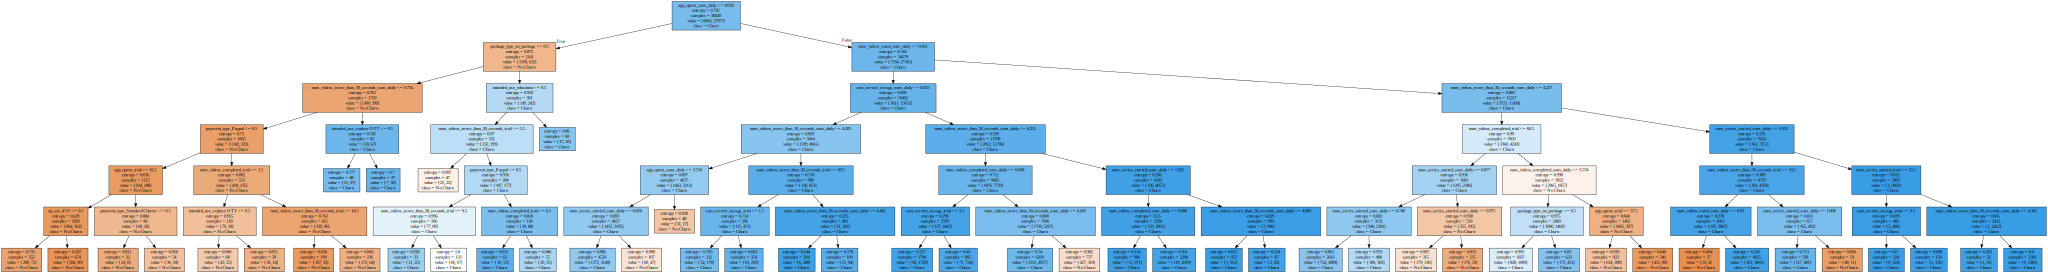

In [474]:
graph = Source(tree.export_graphviz(tree_1, out_file=None
   , feature_names=X.columns, class_names=['No Churn', 'Churn'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

In [476]:
graph.render(filename='churn_tree_2')

'churn_tree_2.pdf'

### Try with more robust DT methods

In [479]:
#Creating random forest models

from sklearn.ensemble import RandomForestClassifier

rf_1 =RandomForestClassifier(n_estimators=20,criterion="entropy",max_depth=8,max_features=12,min_samples_leaf=30)
rf_1.fit(X_train,Y_train)

print("Accuracy for Random Forest Training set: %.5f" %(rf_1.score(X_train,Y_train)))
print("Accuracy for Random Forest Test set: %.5f" %(rf_1.score(X_test,Y_test)))

print(confusion_matrix(Y_test,rf_1.predict(X_test)))
print(classification_report(Y_test,rf_1.predict(X_test)))

Accuracy for Random Forest Training set: 0.83623
Accuracy for Random Forest Test set: 0.83816
[[ 1415  2290]
 [  264 11812]]
              precision    recall  f1-score   support

           0       0.84      0.38      0.53      3705
           1       0.84      0.98      0.90     12076

    accuracy                           0.84     15781
   macro avg       0.84      0.68      0.71     15781
weighted avg       0.84      0.84      0.81     15781



In [478]:
param_test = {
        'max_depth': [4,5,6,7,8], 'max_features': [6,8,10,12]
    }

estimator = RandomForestClassifier(random_state = 0,n_estimators=10)
gsearch = GridSearchCV(estimator, param_grid = param_test, cv=10)
gsearch.fit(X_train,Y_train)
print(gsearch.best_params_)

{'max_depth': 8, 'max_features': 12}


In [480]:
#Get Feature Importance

columns = X_train.columns
for i in range(len(columns)):
    print(columns[i])
    print(rf_1.feature_importances_[i])

app_opens_trial
0.009241145174664457
cust_service_mssgs_trial
0.005423200862034819
num_videos_completed_trial
0.014527000150891395
num_videos_more_than_30_seconds_trial
0.03274830603649365
num_videos_rated_trial
0.00017386194338399078
num_series_started_trial
0.004690050392662478
app_opens_sum_daily
0.12878420679357558
cust_service_mssgs_sum_daily
0.06527697750883277
num_videos_completed_sum_daily
0.084857109456788
num_videos_more_than_30_seconds_sum_daily
0.4241823259849241
num_videos_rated_sum_daily
0.02737037006986152
num_series_started_sum_daily
0.1373409260644372
discount_price
0.0
package_type_economy
0.0002669298451581229
package_type_enhanced
0.000755645784746005
package_type_no_package
0.04228249962023906
preferred_genre_drama
0.000533202137179132
preferred_genre_international
0.0001359985045615415
preferred_genre_other
0.0
preferred_genre_regional
0.00020681571728022207
intended_use_education
0.0007758051130552715
intended_use_expand international access
0.006292544796087443


In [481]:
from sklearn.ensemble import GradientBoostingClassifier

gb_1 =GradientBoostingClassifier(n_estimators=50,max_depth=4,min_samples_leaf=30,max_features=8)
gb_1.fit(X_train,Y_train)

print("Accuracy for RF Training set: %.5f" %(gb_1.score(X_train,Y_train)))
print("Accuracy for RF Test set: %.5f" %(gb_1.score(X_test,Y_test)))

print(confusion_matrix(Y_train,gb_1.predict(X_train)))
print(classification_report(Y_test,gb_1.predict(X_test)))


Accuracy for RF Training set: 0.83332
Accuracy for RF Test set: 0.83537
[[ 3547  5296]
 [  841 27136]]
              precision    recall  f1-score   support

           0       0.80      0.40      0.53      3705
           1       0.84      0.97      0.90     12076

    accuracy                           0.84     15781
   macro avg       0.82      0.68      0.72     15781
weighted avg       0.83      0.84      0.81     15781



### Logistic Regression

In [638]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(C=100)
lg.fit(X_train, Y_train)
y_pred = lg.predict(X_test)

print("Accuracy for Log Reg Training set: %.5f" %(lg.score(X_train,Y_train)))
print("Accuracy for Log Reg Tree Test set: %.5f" %(lg.score(X_test,Y_test)))

print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))
print(f1_score(Y_test,y_pred))

Accuracy for Log Reg Training set: 0.76793
Accuracy for Log Reg Tree Test set: 0.77302
[[  228  3477]
 [  105 11971]]
              precision    recall  f1-score   support

           0       0.68      0.06      0.11      3705
           1       0.77      0.99      0.87     12076

    accuracy                           0.77     15781
   macro avg       0.73      0.53      0.49     15781
weighted avg       0.75      0.77      0.69     15781

0.8698590321174249


c:\users\phion\dropbox\nyu\spring 2020\marketing analytics\churn\final-project\.git\venv\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [486]:
index = 0
for i in lg.coef_[0]:
    print("%s      %.5f" %(X_train.columns[index],i))
    index += 1

app_opens_trial      -0.00051
cust_service_mssgs_trial      -0.01266
num_videos_completed_trial      -0.00829
num_videos_more_than_30_seconds_trial      0.00333
num_videos_rated_trial      0.02128
num_series_started_trial      -0.00716
app_opens_sum_daily      0.01786
cust_service_mssgs_sum_daily      0.49690
num_videos_completed_sum_daily      -0.06236
num_videos_more_than_30_seconds_sum_daily      0.48087
num_videos_rated_sum_daily      0.01487
num_series_started_sum_daily      -0.38067
discount_price      0.02639
package_type_economy      -0.11993
package_type_enhanced      0.16808
package_type_no_package      0.26013
preferred_genre_drama      -0.03672
preferred_genre_international      -0.04315
preferred_genre_other      -0.01625
preferred_genre_regional      -0.02875
intended_use_education      0.02644
intended_use_expand international access      0.10625
intended_use_expand regional access      0.11046
intended_use_other      0.02031
intended_use_replace OTT      -0.10086
intend

### OLS 

In [639]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)

print("Accuracy for Linear Reg Training set: %.5f" %(lr.score(X_train,Y_train)))
print("Accuracy for Linear Reg Tree Test set: %.5f" %(lr.score(X_test,Y_test)))

Accuracy for Linear Reg Training set: 0.05704
Accuracy for Linear Reg Tree Test set: 0.05197


## Evaluation : Building AUC, ROC Curves

In [488]:
#Method for ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

def plot_roc_curve(predict1,predict2):
    logit_roc_auc = roc_auc_score(Y_test, predict1)
    fpr, tpr, thresholds = roc_curve(Y_test, predict2)
    plt.figure()
    plt.plot(fpr, tpr, label='Area = %0.3f' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

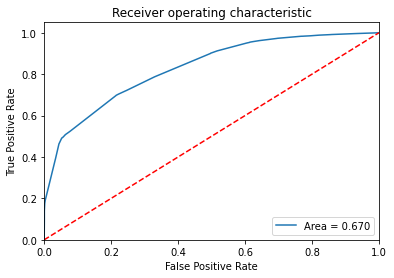

In [489]:
#Tree ROC
plot_roc_curve(tree_1.predict(X_test),tree_1.predict_proba(X_test)[:,1])

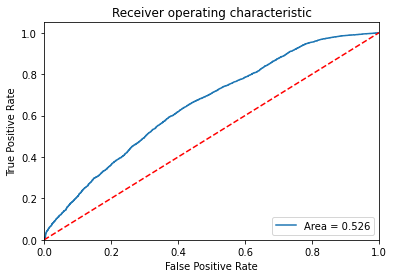

In [490]:
#Log Reg ROC
plot_roc_curve(lg.predict(X_test),lg.predict_proba(X_test)[:,1])

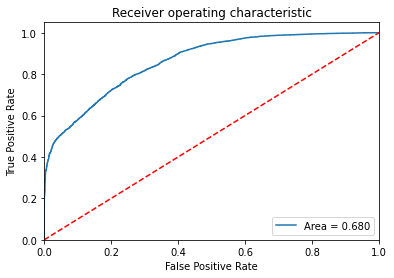

In [491]:
#Random Forest ROC
plot_roc_curve(rf_1.predict(X_test),rf_1.predict_proba(X_test)[:,1])

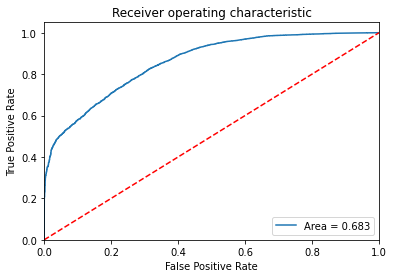

In [492]:
#GBDT ROC
plot_roc_curve(gb_1.predict(X_test),gb_1.predict_proba(X_test)[:,1])

# Revenue Modelling

In [602]:
#Get dataframe of predicted probabilities from decision tree model, join with actual Y labels, merge subids back to this dataframe

Churn_proba_testdata = pd.DataFrame(data=tree_1.predict_proba(X_test)).join(pd.DataFrame(Y_test).reset_index())

Churn_proba_testdata = Churn_proba_testdata.merge(pd.DataFrame(df['subid']).reset_index(),on='index')

In [603]:
Churn_proba_testdata 

,0,1,index,churn,subid
0,0.248062,0.751938,30698,1,22231201
1,0.167959,0.832041,49897,1,21402521
2,0.000000,1.000000,14956,1,20918725
3,0.061106,0.938894,47079,1,28909538
4,0.868936,0.131064,27495,0,24454559
...,...,...,...,...,...
15776,0.196733,0.803267,11959,1,27946710
15777,0.047742,0.952258,10874,1,27560343
15778,0.000000,1.000000,13286,1,21741458
15779,0.248062,0.751938,32782,1,26886035


In [604]:
#Organize and rename columns
churn_df = Churn_proba_testdata[['index','subid','churn',1]]
churn_df.columns = ['index','subid','y_actual','y_pred']
churn_df

,index,subid,y_actual,y_pred
0,30698,22231201,1,0.751938
1,49897,21402521,1,0.832041
2,14956,20918725,1,1.000000
3,47079,28909538,1,0.938894
4,27495,24454559,0,0.131064
...,...,...,...,...
15776,11959,27946710,1,0.803267
15777,10874,27560343,1,0.952258
15778,13286,21741458,1,1.000000
15779,32782,26886035,1,0.751938


In [495]:
#hardcoded variable
accept_offer_rate = 0.3

In [496]:
#Individual methods

def get_offer(y_pred,threshold):
    if y_pred >= threshold:
        return 1
    else:
        return 0

import random

def accept_offer(get_offer):
    if get_offer == 1:
        if random.random() <= accept_offer_rate:
            return 1
        else:
            return 0
    else:
        return 0
    
def renew_at_base(row,threshold):
    label = 0
    label_1 = 'get_offer_' + str(threshold)
    label_2 = 'accept_offer_' + str(threshold)
    #if they were going to renew at base, and if they didnt get an offer, or they got the offer but didnt accept:
    if (row.y_actual == 0):
        if (row[label_1] == 0) | ((row[label_1] == 1) & (row[label_2] == 0)):
            label = 1
    return label

def get_plan(row,threshold):
    label_1 = 'accept_offer_' + str(threshold)
    label_2 = 'renew_at_base_' + str(threshold)
    if row[label_1] == 1:
        return 'offer'
    elif row[label_2] == 1:
        return 'base'
    else:
        return 'churn'

In [497]:
#Combining them together

#Method takes in the churn_df, acceptance rate, and specified threshold

def process_table(churn_df, accept_offer_rate, threshold):
    
    #Get_Offer
    label_1 = 'get_offer_' + str(threshold)
    churn_df[label_1] = churn_df.apply(lambda x: get_offer(x['y_pred'], threshold), axis=1)
    
    #Accept Offer
    label_2 = 'accept_offer_' + str(threshold)
    churn_df[label_2] = churn_df[label_1].apply(accept_offer)
    
    #Renew at base
    label_3 = 'renew_at_base_' + str(threshold)
    churn_df[label_3] = churn_df.apply(lambda x: renew_at_base(x, threshold),axis=1)
    
    #get plan
    label_4 = 'plan_' + str(threshold)
    churn_df[label_4] = churn_df.apply(lambda x: get_plan(x,threshold),axis=1)
    
    return churn_df

In [516]:
processed_churn_df = process_table(churn_df,accept_offer_rate,0.5)
processed_churn_df_30 = process_table(churn_df,accept_offer_rate,0.3)

In [517]:
processed_churn_df_30

,index,subid,y_actual,y_pred,get_offer_0.5,accept_offer_0.5,renew_at_base_0.5,plan_0.5,get_offer_0.7,accept_offer_0.7,renew_at_base_0.7,plan_0.7,get_offer_0.4,accept_offer_0.4,renew_at_base_0.4,plan_0.4,get_offer_0.3,accept_offer_0.3,renew_at_base_0.3,plan_0.3
0,30698,22231201,1,0.911801,1,0,0,churn,1,1,0,offer,1,1,0,offer,1,0,0,churn
1,49897,21402521,1,0.696460,1,0,0,churn,0,0,0,churn,1,0,0,churn,1,0,0,churn
2,14956,20918725,1,1.000000,1,0,0,churn,1,0,0,churn,1,0,0,churn,1,0,0,churn
3,47079,28909538,1,0.804348,1,0,0,churn,1,1,0,offer,1,1,0,offer,1,0,0,churn
4,27495,24454559,0,0.714718,1,0,1,base,1,1,0,offer,1,1,0,offer,1,1,0,offer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15776,11959,27946710,1,0.963211,1,0,0,churn,1,0,0,churn,1,1,0,offer,1,1,0,offer
15777,10874,27560343,1,0.946558,1,0,0,churn,1,1,0,offer,1,0,0,churn,1,1,0,offer
15778,13286,21741458,1,1.000000,1,0,0,churn,1,0,0,churn,1,0,0,churn,1,1,0,offer
15779,32782,26886035,1,0.790716,1,0,0,churn,1,0,0,churn,1,1,0,offer,1,0,0,churn


In [519]:
processed_churn_df.groupby('plan_0.3').count()

,index,subid,y_actual,y_pred,get_offer_0.5,accept_offer_0.5,renew_at_base_0.5,plan_0.5,get_offer_0.7,accept_offer_0.7,renew_at_base_0.7,plan_0.7,get_offer_0.4,accept_offer_0.4,renew_at_base_0.4,plan_0.4,get_offer_0.3,accept_offer_0.3,renew_at_base_0.3
plan_0.3,,,,,,,,,,,,,,,,,,,
base,2854,2854,2854,2854,2854,2854,2854,2854,2854,2854,2854,2854,2854,2854,2854,2854,2854,2854,2854
churn,8491,8491,8491,8491,8491,8491,8491,8491,8491,8491,8491,8491,8491,8491,8491,8491,8491,8491,8491
offer,4436,4436,4436,4436,4436,4436,4436,4436,4436,4436,4436,4436,4436,4436,4436,4436,4436,4436,4436


In [502]:
processed_churn_df.groupby('y_actual').count()

,index,subid,y_pred,get_offer_0.5,accept_offer_0.5,renew_at_base_0.5,plan_0.5
y_actual,,,,,,,
0,3705,3705,3705,3705,3705,3705,3705
1,12076,12076,12076,12076,12076,12076,12076


In [ ]:
#Try with 0.7 threshold

In [254]:
processed_churn_df_70 = process_table(churn_df,accept_offer_rate,0.7)

In [256]:
processed_churn_df_70.groupby('plan_0.7').count()

,index,subid,y_actual,y_pred,get_offer_0.5,accept_offer_0.5,renew_at_base_0.5,plan_0.5,get_offer_0.7,accept_offer_0.7,renew_at_base_0.7
plan_0.7,,,,,,,,,,,
base,3090,3090,3090,3090,3090,3090,3090,3090,3090,3090,3090
churn,8691,8691,8691,8691,8691,8691,8691,8691,8691,8691,8691
offer,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000


In [257]:
processed_churn_df_70.groupby('y_actual').count()

,index,subid,y_pred,get_offer_0.5,accept_offer_0.5,renew_at_base_0.5,plan_0.5,get_offer_0.7,accept_offer_0.7,renew_at_base_0.7,plan_0.7
y_actual,,,,,,,,,,,
0,3705,3705,3705,3705,3705,3705,3705,3705,3705,3705,3705
1,12076,12076,12076,12076,12076,12076,12076,12076,12076,12076,12076


Proforma calculations are continued on Excel

# Calculating Customer CLV

## Get CAC for Each Customer

In [295]:
#(this DF is from part 2)
ad_merged_filtered

,year,month,attribution,total_users,paying_users,spend,CPA,CAC
8,2019,7,affiliate,839,440,1395.865289,1.663725,3.172421
9,2019,7,brand sem intent google,2090,874,2477.660889,1.185484,2.834852
10,2019,7,email,3260,1521,8793.951323,2.697531,5.781691
11,2019,7,email_blast,1510,801,3466.398802,2.295628,4.327589
12,2019,7,facebook,10011,3884,6979.326447,0.697166,1.796943
...,...,...,...,...,...,...,...,...
75,2020,3,email_blast,56,26,40.875661,0.729923,1.572141
76,2020,3,facebook,6889,2603,6689.983204,0.971111,2.570105
77,2020,3,pinterest,455,175,803.888002,1.766787,4.593646
78,2020,3,referral,568,337,1362.522038,2.398806,4.043092


In [330]:
#Keep only necessary info for CLV/CAC Analysis
ad_merge_CAC = ad_merged_filtered[['year','month','attribution','CAC']]

In [346]:
#Get mean CAC for imputation later
ad_merge_CAC['CAC'].mean()

5.521560453387594

In [328]:
#This DF was from churn modelling section
df['account_creation_date_x'] = pd.to_datetime(df['account_creation_date_x'])

df['month'],df['year'] = df['account_creation_date_x'].dt.month, df['account_creation_date_x'].dt.year

In [567]:
#Keep only necessary columns
df_CAC = df[['subid','month','year','attribution_technical','monthly_price','discount_price','join_fee']]
df_CAC.columns = ['subid','month','year','attribution','monthly_price','discount_price','join_fee']

In [615]:
#Merge DF with CAC, on year, month and channel

df_subid_CAC = df_CAC.merge(ad_merge_CAC,how='left',on=['year','month','attribution'])
df_subid_CAC

,subid,month,year,attribution,monthly_price,discount_price,join_fee,CAC
0,23796492,3,2020,organic,4.7343,4.5141,0.0367,NaN
1,20162910,3,2020,brand sem intent google,4.7343,4.5141,0.3303,3.836051
2,22120282,3,2020,facebook_organic,4.7343,4.5141,0.3303,NaN
3,22652005,3,2020,google_organic,4.7343,4.5141,0.3303,NaN
4,25839343,3,2020,organic,4.7343,4.5141,0.3303,NaN
...,...,...,...,...,...,...,...,...
52596,25511690,6,2019,email,4.7343,4.5141,0.0000,NaN
52597,25654158,6,2019,organic,4.7343,4.5141,0.0000,NaN
52598,27196054,6,2019,facebook,4.7343,4.5141,NaN,NaN
52599,26531005,6,2019,email_blast,4.7343,4.5141,0.0367,NaN


In [618]:
#Fill '0' for CAC for Organic Channels
organic_channels = ['organic','google_organic','bing_organic','pininterest_organic','facebook_organic']

def fill_organic(row):
    if row.attribution in organic_channels:
        return 0
    else:
        return row.CAC
    
df_subid_CAC['CAC_filled'] = df_subid_CAC.apply(fill_organic,axis=1)

In [621]:
#For the rest, fill in the average CAC
df_subid_CAC['CAC_filled'] = df_subid_CAC['CAC_filled'].fillna(5.521)

In [623]:
df_subid_CAC['join_fee'] = df_subid_CAC['join_fee'].fillna(0) #assume those with join fee NA value = 0 

In [624]:
#Merge this with churn_df, which has the churn probabilities

df_CLV = churn_df.merge(df_subid_CAC,on='subid',how='left')

In [626]:
df_CLV

,index,subid,y_actual,y_pred,month,year,attribution,monthly_price,discount_price,join_fee,CAC,CAC_filled
0,30698,22231201,1,0.751938,10,2019,brand sem intent google,4.7343,4.5141,0.0367,5.479293,5.479293
1,49897,21402521,1,0.832041,7,2019,brand sem intent google,4.7343,4.5141,0.0367,2.834852,2.834852
2,14956,20918725,1,1.000000,1,2020,email,4.7343,4.5141,0.0000,18.918698,18.918698
3,47079,28909538,1,0.938894,7,2019,organic,4.7343,4.5141,0.0367,NaN,0.000000
4,27495,24454559,0,0.131064,11,2019,facebook,4.7343,4.5141,0.0367,1.553412,1.553412
...,...,...,...,...,...,...,...,...,...,...,...,...
15776,11959,27946710,1,0.803267,2,2020,facebook,4.7343,4.5141,0.0000,2.712962,2.712962
15777,10874,27560343,1,0.952258,2,2020,email,4.7343,4.5141,0.0000,9.741967,9.741967
15778,13286,21741458,1,1.000000,2,2020,affiliate,4.7343,4.5141,0.0367,3.550987,3.550987
15779,32782,26886035,1,0.751938,10,2019,affiliate,4.7343,4.5141,0.0000,4.443918,4.443918


## Getting CLV

In [629]:
discount_rate = 0.03 #Assumption 0.1 annual discount rate, so for 4 months is 3%

def get_CLV(row):
    
    #timeframe here is one billing period, or 4 months
    clv = (row['discount_price']*4) * ((1+discount_rate)/((1+discount_rate) - (1- row['y_pred']))) 
    
    #clv add the revenue you already got from them, - CAC
    clv = clv + (row['discount_price'] * 4) + row['join_fee'] - row['CAC_filled']
    
    return clv

df_CLV['CLV_with_CAC'] = df_CLV.apply(get_CLV,axis=1)

#for CLV_without_CAC, remove row['CAC_filled'] from method and run again

In [630]:
df_CLV

,index,subid,y_actual,y_pred,month,year,attribution,monthly_price,discount_price,join_fee,CAC,CAC_filled,CLV_with_CAC,CLV_without_CAC
0,30698,22231201,1,0.751938,10,2019,brand sem intent google,4.7343,4.5141,0.0367,5.479293,5.479293,36.398420,41.877713
1,49897,21402521,1,0.832041,7,2019,brand sem intent google,4.7343,4.5141,0.0367,2.834852,2.834852,36.832726,39.667578
2,14956,20918725,1,1.000000,1,2020,email,4.7343,4.5141,0.0000,18.918698,18.918698,17.194102,36.112800
3,47079,28909538,1,0.938894,7,2019,organic,4.7343,4.5141,0.0367,NaN,0.000000,37.288272,37.288272
4,27495,24454559,0,0.131064,11,2019,facebook,4.7343,4.5141,0.0367,1.553412,1.553412,132.010008,133.563420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15776,11959,27946710,1,0.803267,2,2020,facebook,4.7343,4.5141,0.0000,2.712962,2.712962,37.662917,40.375879
15777,10874,27560343,1,0.952258,2,2020,email,4.7343,4.5141,0.0000,9.741967,9.741967,27.248446,36.990413
15778,13286,21741458,1,1.000000,2,2020,affiliate,4.7343,4.5141,0.0367,3.550987,3.550987,32.598513,36.149500
15779,32782,26886035,1,0.751938,10,2019,affiliate,4.7343,4.5141,0.0000,4.443918,4.443918,37.397095,41.841013


In [635]:
#Export table of CLV to Tableau to plot
df_CLV.to_csv('distribution_of_CLV_v2.csv')